In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
page = requests.get('https://forecast.weather.gov/MapClick.php?lat=32.96119330000005&lon=-96.78433859999996#.Xp93HGhKhPY')
soup = BeautifulSoup(page.content, 'html.parser')
week = soup.find(id='seven-day-forecast-container')
items = week.find_all(class_="tombstone-container")
#print(items[0])

In [13]:
print(items[0].find(class_='period-name').get_text())
print(items[0].find(class_='short-desc').get_text())
print(items[0].find(class_='temp').get_text())

Tonight
Clear
Low: 57 °F


In [14]:
period_names = [item.find(class_='period-name').get_text() for item in items]
short_description = [item.find(class_='short-desc').get_text() for item in items]
temperatures = [item.find(class_='temp').get_text() for item in items]

In [15]:
print(period_names)
print(short_description)
print(temperatures)

['Tonight', 'Saturday', 'SaturdayNight', 'Sunday', 'SundayNight', 'Monday', 'MondayNight', 'Tuesday', 'TuesdayNight']
['Clear', 'Mostly Sunny', 'Mostly Clear', 'Sunny', 'Partly Cloudy', 'Partly Sunny', 'Mostly Cloudy', 'Slight ChanceT-storms', 'ChanceT-storms']
['Low: 57 °F', 'High: 76 °F', 'Low: 54 °F', 'High: 80 °F', 'Low: 60 °F', 'High: 82 °F', 'Low: 67 °F', 'High: 88 °F', 'Low: 65 °F']


In [16]:
weather_stuff = pd.DataFrame(
       {'period': period_names,
       'short_description': short_description,
       'temperatures': temperatures,
       })
print(weather_stuff)

          period      short_description temperatures
0        Tonight                  Clear   Low: 57 °F
1       Saturday           Mostly Sunny  High: 76 °F
2  SaturdayNight           Mostly Clear   Low: 54 °F
3         Sunday                  Sunny  High: 80 °F
4    SundayNight          Partly Cloudy   Low: 60 °F
5         Monday           Partly Sunny  High: 82 °F
6    MondayNight          Mostly Cloudy   Low: 67 °F
7        Tuesday  Slight ChanceT-storms  High: 88 °F
8   TuesdayNight         ChanceT-storms   Low: 65 °F


In [28]:
tips = sns.load_dataset('tips')


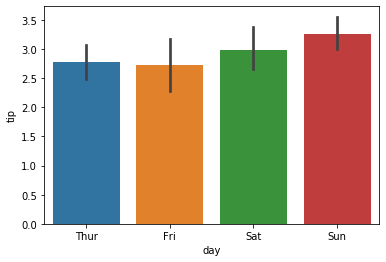

In [29]:
sns.barplot(x='day', y='tip' , data=tips)
            